In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Open sp500 fundamentals files

In [2]:
# annual statements
balance_annual = pd.read_csv('~/Documents/MOYI_Project/Minerva-DataExtractor/sp500_fundamentals_dfs/2020-01-10/505stocks_annual_balance.csv')
cash_annual = pd.read_csv('~/Documents/MOYI_Project/Minerva-DataExtractor/sp500_fundamentals_dfs/2020-01-10/505stocks_annual_cash.csv')
income_annual = pd.read_csv('~/Documents/MOYI_Project/Minerva-DataExtractor/sp500_fundamentals_dfs/2020-01-10/505stocks_annual_income.csv')

# quarterly statements
balance_quarter = pd.read_csv('~/Documents/MOYI_Project/Minerva-DataExtractor/sp500_fundamentals_dfs/2020-01-10/505stocks_quarterly_balance.csv')
cash_quarter = pd.read_csv('~/Documents/MOYI_Project/Minerva-DataExtractor/sp500_fundamentals_dfs/2020-01-10/505stocks_quarterly_cash.csv')
income_quarter = pd.read_csv('~/Documents/MOYI_Project/Minerva-DataExtractor/sp500_fundamentals_dfs/2020-01-10/505stocks_quarterly_income.csv')

# key statistics
key_stats = pd.read_csv('~/Documents/MOYI_Project/Minerva-DataExtractor/sp500_key_statistics_dfs/2020-01-10/505stocks_key_statistics.csv')

# industry sector 
industry = pd.read_csv('~/Documents/MOYI_Project/Minerva-DataExtractor/sp500_tickers_sectors.csv')

In [3]:
# setting key statistics metrics as dataframe indexes
key_stats.rename(columns={'Unnamed: 0':'key_statistics'},inplace=True)
key_stats.set_index('key_statistics',inplace=True)

# drop rows with all nans
key_stats.dropna(how='all',axis=0,inplace=True)

In [4]:
key_stats.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
key_statistics,,,,,,,,,,,,,,,,,,,,,
52WeekChange,-0.06404966,0.25130284,0.02278912,-0.4521529,0.4021901,0.15559888,0.4318459,1.4807498,-0.07390809,0.3207301,...,0.2760322,0.2693323,0.6523702,0.12327099,0.16282094,0.12169075,0.5372622,0.4327035,0.17915905,0.5722933
SandP52WeekChange,0.26112986,0.26112986,0.26112986,0.26112986,0.26112986,0.26112986,0.26112986,0.26112986,0.26112986,0.26112986,...,0.26112986,0.26112986,0.26112986,0.26112986,0.26112986,0.26112986,0.26112986,0.26112986,0.26112986,0.26112986
beta,1.101449,1.107416,0.947144,0.274509,1.040068,0.836317,1.105711,3.092924,0.832907,1.082693,...,2.085251,0.097186,1.794266,1.219948,1.157715,0.335038,1.65177,1.155157,1.577152,0.799658
bookValue,18.611,17.991,-5.563,21.916,23.885,15.928,21.831,1.953,50.17,4.73,...,17.96,25.06,22.173,10.721,16.024,-26.723,31.343,58.762,40.752,5.617
dateShortInterest,1576195200,1576195200,1576195200,1576195200,1576195200,1576195200,1576195200,1576195200,1576195200,1576195200,...,1576195200,1576195200,1576195200,1576195200,1576195200,1576195200,1576195200,1576195200,1576195200,1576195200


In [39]:
key_stats.index.to_list()

['52WeekChange',
 'SandP52WeekChange',
 'beta',
 'bookValue',
 'dateShortInterest',
 'earningsQuarterlyGrowth',
 'enterpriseToEbitda',
 'enterpriseToRevenue',
 'enterpriseValue',
 'floatShares',
 'forwardEps',
 'forwardPE',
 'fundInceptionDate',
 'heldPercentInsiders',
 'heldPercentInstitutions',
 'lastFiscalYearEnd',
 'lastSplitDate',
 'lastSplitFactor',
 'maxAge',
 'mostRecentQuarter',
 'netIncomeToCommon',
 'nextFiscalYearEnd',
 'pegRatio',
 'priceHint',
 'priceToBook',
 'profitMargins',
 'sharesOutstanding',
 'sharesPercentSharesOut',
 'sharesShort',
 'sharesShortPreviousMonthDate',
 'sharesShortPriorMonth',
 'shortPercentOfFloat',
 'shortRatio',
 'trailingEps']

In [5]:
# clean up industry dataset
industry.set_index('tickers',inplace=True)
industry = pd.DataFrame(data={'sectors':[value[0].strip('\n') for value in industry.values]},index=industry.index)

In [6]:
industry.head()

,sectors
tickers,
BKNG,consumer_discretionary
COO,health_care
AAL,industrials
GD,industrials
KR,consumer_staples


In [9]:
# prepare datasets for industry vs. few statistics
categories = ['52WeekChange','beta','bookValue','earningsQuarterlyGrowth','heldPercentInstitutions']
statistics = key_stats.loc[categories].fillna(0).T

In [10]:
statistics.head()

key_statistics,52WeekChange,beta,bookValue,earningsQuarterlyGrowth,heldPercentInstitutions
MMM,-0.06404966,1.101449,18.611,0.026,0.11174
ABT,0.25130284,1.107416,17.991,0.705,0.76105005
ABBV,0.02278912,0.947144,-5.563,-0.314,0.73682
ABMD,-0.4521529,0.274509,21.916,-0.739,0.93973
ACN,0.4021901,1.040068,23.885,0.065,0.74896


In [11]:
# convert dtypes to numeric
statistics = statistics.astype('float64')

In [12]:
# merge into one
industry_vs_statistics = pd.concat([statistics,industry], axis = 1, sort = False)

In [13]:
industry_vs_statistics.head()

,52WeekChange,beta,bookValue,earningsQuarterlyGrowth,heldPercentInstitutions,sectors
MMM,-0.064050,1.101449,18.611,0.026,0.11174,industrials
ABT,0.251303,1.107416,17.991,0.705,0.76105,health_care
ABBV,0.022789,0.947144,-5.563,-0.314,0.73682,health_care
ABMD,-0.452153,0.274509,21.916,-0.739,0.93973,health_care
ACN,0.402190,1.040068,23.885,0.065,0.74896,information_technology


In [14]:
# average statistics based on industry
industry_vs_statistics.groupby('sectors').mean()

,52WeekChange,beta,bookValue,earningsQuarterlyGrowth,heldPercentInstitutions
sectors,,,,,
communication_services,inf,0.952554,43.213808,0.170038,0.788993
consumer_discretionary,0.171946,1.017759,30.899703,0.003031,0.861146
consumer_staples,0.200602,0.553521,18.419031,0.120562,0.749314
energy,-0.036566,1.398430,34.452071,0.559571,0.803895
financials,0.263647,1.126037,56.246369,0.014908,0.763641
health_care,0.214780,0.990567,37.238131,0.244361,0.857062
industrials,0.272942,1.202630,25.314681,0.026667,0.819050
information_technology,inf,1.274798,19.772943,0.073443,0.841562
materials,inf,1.106590,32.436714,0.042214,0.816370


In [15]:
# infinity data exist in 52WeekChange
industry_vs_statistics[industry_vs_statistics['52WeekChange'] == np.inf]

,52WeekChange,beta,bookValue,earningsQuarterlyGrowth,heldPercentInstitutions,sectors
CTVA,inf,0.000000,33.425,0.000,0.76820,materials
DOW,inf,0.000000,23.465,-0.671,0.70017,materials
FOXA,inf,0.000000,16.628,-0.174,0.99094,communication_services
FOX,inf,0.000000,16.628,-0.174,0.56887,communication_services
NLOK,inf,1.118887,0.000,0.000,0.84940,information_technology


In [16]:
# replace infinity within 52WeekChange to max possible value which is 1
industry_vs_statistics['52WeekChange'].replace(np.inf,1,inplace=True)
np.sum(industry_vs_statistics['52WeekChange'] == np.inf)

0

In [17]:
# average statistics based on industry with out infinity data
average_statistics_on_sectors = industry_vs_statistics.groupby('sectors').mean()
average_statistics_on_sectors

,52WeekChange,beta,bookValue,earningsQuarterlyGrowth,heldPercentInstitutions
sectors,,,,,
communication_services,0.255263,0.952554,43.213808,0.170038,0.788993
consumer_discretionary,0.171946,1.017759,30.899703,0.003031,0.861146
consumer_staples,0.200602,0.553521,18.419031,0.120562,0.749314
energy,-0.036566,1.398430,34.452071,0.559571,0.803895
financials,0.263647,1.126037,56.246369,0.014908,0.763641
health_care,0.214780,0.990567,37.238131,0.244361,0.857062
industrials,0.272942,1.202630,25.314681,0.026667,0.819050
information_technology,0.405575,1.274798,19.772943,0.073443,0.841562
materials,0.215455,1.106590,32.436714,0.042214,0.816370


In [18]:
# total bookValue by sectors
total_bookValue_on_sectors = industry_vs_statistics.groupby('sectors').sum().bookValue
total_bookValue_on_sectors

sectors
communication_services    1123.559
consumer_discretionary    1977.581
consumer_staples           589.409
energy                     964.658
financials                3656.014
health_care               2271.526
industrials               1746.713
information_technology    1384.106
materials                  908.228
real_estate                951.941
utilities                  945.853
Name: bookValue, dtype: float64

In [20]:
import plotly.express as px
import matplotlib.cm as cm
from matplotlib.colors import Normalize
plt.style.use('ggplot')

In [32]:
# draw picture function
def bar(columns):
    plt.figure(figsize=(8,8))
    
    # plot
    average_statistics_on_sectors[columns].plot(kind='barh', color=['orange', 'lightcoral', 'green', 'blue', 'teal','violet','brown','yellow','lightskyblue','hotpink','chocolate'])
    
    # change font 
    plt.rcParams['font.sans-serif'] = 'Helvetica'
    
    # set style for axes
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'

    # title and label
    plt.title('average {} on industry sector'.format(columns))
    plt.xlabel('percentage')
    plt.show()
    
def pie(column, data_type):
    if data_type == 'average':
        df = average_statistics_on_sectors
        fig = px.pie(df, values=column, names=df.index , title= f'Average {column} on industry sectors')
        fig.show()
        
    if data_type == 'total':
        df = total_bookValue_on_sectors
        fig = px.pie(df, values=column, names=df.index , title=f'Total {column} on industry sectors')
        fig.show()

In [33]:
# draw pies
pie(column = '52WeekChange',data_type='average')

In [34]:
pie(column = 'heldPercentInstitutions', data_type='average')

In [35]:
pie(column = 'bookValue',data_type='total')

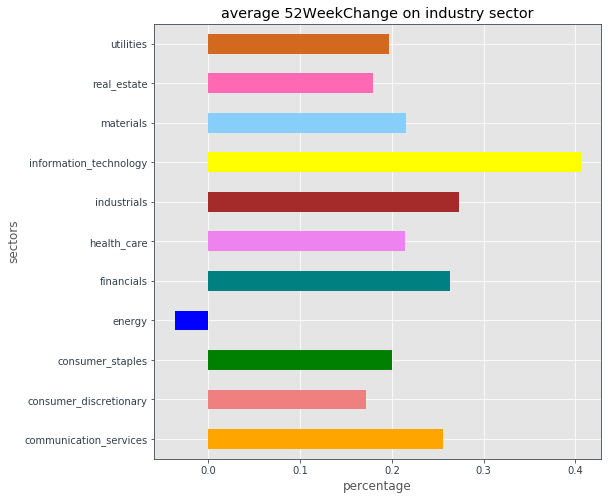

In [37]:
bar('52WeekChange')

In [ ]:
bar('earningsQuarterlyGrowth')

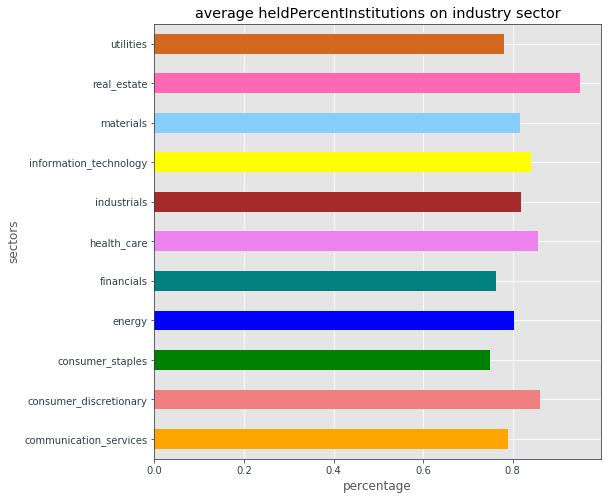

In [155]:
bar('heldPercentInstitutions')